In [3]:
# look at the performance from openai's impl
!ls ~/logs/ppo/pendulum

0.0.monitor.csv  log.txt  progress.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

logfile = '/home/ubuntu/tmp/logs/ppo/pendulum/progress.csv'

prog =pd.read_csv(logfile)

prog

,FPS,MAEpLen,MAEpRet,MeanStepRew,PolicyNetAvgW,Q,VQDiff,ValueNetAvgW,cliprange,explained_variance,iteration/nupdates,loss,vpreds
0,1297,NaN,NaN,0.070483,-0.000071,1.073646,8.149430,0.000154,0.2000,-0.010520,1/1000,0.133533,0.005969
1,3973,0.0,0.003908,-0.012811,-0.000055,-0.209811,0.481717,0.000152,0.1991,0.081663,10/1000,-0.354410,-0.297812
2,3928,0.0,-0.061360,-0.069477,-0.000072,-1.005353,0.710997,0.000123,0.1981,0.023826,20/1000,-0.481536,-0.615854
3,3955,0.0,-0.063189,-0.054638,-0.000109,-0.749073,0.400524,0.000135,0.1971,0.128767,30/1000,-0.158555,-0.979045
4,3911,0.0,0.058233,0.088210,-0.000121,1.556363,5.800211,0.000191,0.1961,0.047720,40/1000,0.076081,-0.094098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,3957,0.0,-0.087419,-0.087142,-0.000092,-1.295534,0.319382,0.002546,0.1131,0.306611,870/1000,-0.361447,-1.414512
88,3949,0.0,-0.077743,-0.077320,-0.000108,-1.157785,0.198604,0.002703,0.1121,0.438858,880/1000,-0.732294,-1.262289
89,3963,0.0,-0.051866,-0.049379,-0.000130,-0.786464,0.689976,0.001905,0.1111,-9.567468,890/1000,-0.243691,-0.690682
90,3944,0.0,0.082476,0.084525,-0.000134,1.221979,5.741373,0.000529,0.1101,-1.498158,900/1000,0.115107,1.535811


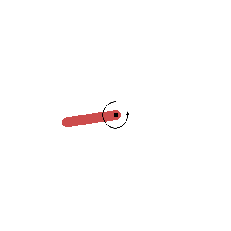

total reward:  [-6560.5098726]
avg reward:  [-6.56050987]


<Figure size 432x288 with 0 Axes>

In [13]:
from rlkits.policies import PolicyWithValue
from rlkits.env_batch import SingleEnvBatch
from rlkits.utils import inspect_agent

import torch

import gym

def make_env():
    return gym.make('Pendulum-v0')

env = SingleEnvBatch(make_env())

ob_space = env.observation_space
ac_space = env.action_space

pi = PolicyWithValue(ob_space=ob_space,
    ac_space=ac_space, ckpt_dir='/tmp',
    hidden_layers=[64,64],
    activation=torch.nn.Tanh)


ckpt_dir = '/home/ubuntu/tmp/models/ppo/pendulum'

pi.load_ckpt(ckpt_dir)

inspect_agent(env, pi)

In [8]:
help(inspect_agent)

Help on function inspect_agent in module rlkits.utils.utils:

inspect_agent(env, agent, nsteps=1000)
    Look at how the agent behaves in the 
    env for nsteps time steps



In [2]:
# cartpole

logfile = '/home/ubuntu/tmp/logs/ppo/cartpole/progress.csv'

prog =pd.read_csv(logfile)

prog

,FPS,MAEpLen,MAEpRet,MeanStepRew,PolicyNetAvgW,Q,VQDiff,ValueNetAvgW,cliprange,explained_variance,iteration/nupdates,loss,vpreds
0,1342,19.000000,20.000000,1.0,-0.000096,14.916749,284.69360,-0.000222,0.20000,0.000008,1/10000,284.30084,0.001483
1,4076,20.000000,21.000000,1.0,-0.000095,14.920246,284.43408,-0.000210,0.19991,0.000358,10/10000,284.05283,0.012904
2,4492,23.555556,24.555556,1.0,-0.000094,14.930170,284.21033,-0.000191,0.19981,-0.005166,20/10000,283.84290,0.041648
3,4494,25.782609,26.782609,1.0,-0.000095,14.890427,283.86096,-0.000176,0.19971,-0.000804,30/10000,283.50858,0.006589
4,4494,23.200000,24.200000,1.0,-0.000097,14.818375,281.46500,-0.000171,0.19961,0.004199,40/10000,281.10294,0.008016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,4503,20.620000,21.620000,1.0,-0.000185,15.040274,293.70514,-0.000105,0.10041,-0.033076,9960/10000,293.47382,-0.112245
997,4508,20.610000,21.610000,1.0,-0.000185,14.916975,286.09073,-0.000101,0.10031,0.000708,9970/10000,285.84265,-0.042137
998,4501,21.140000,22.140000,1.0,-0.000183,14.699185,277.73187,-0.000100,0.10021,0.027091,9980/10000,277.47253,-0.025709
999,4502,21.560000,22.560000,1.0,-0.000183,14.706851,278.89264,-0.000101,0.10011,-0.023324,9990/10000,278.63574,0.048982
